In [1]:
import numpy as np
import sympy
sympy.init_printing()

class SymbolVectorMetaclass(type):
    def __getattr__(cls, key):
        return cls(key)

class SymbolVector(metaclass = SymbolVectorMetaclass):
    """
    And infinite array of symbols.
    
    SymbolVector.x yields [x_0, x_1, x_2, ...]
    """
    def __init__(self, name):
        self.name = name

    @staticmethod
    def __getattr__(cls, key):
        return Vector(key)
        
    def __getitem__( self, key ) :
        if isinstance( key, slice ) :
            if (key.start is not None and key.start < 0) or (key.stop is not None and key.stop < 0):
                raise IndexError("Negative indexes are not supported")
            return [self[ii] for ii in range(*key.indices(sys.maxsize))]

        elif isinstance(key, int):
            if key < 0:
                raise IndexError("Negative indexes are not supported")
            return sympy.Symbol(f'{self.name}_{key}')

        else:
            raise TypeError("Invalid argument type.")
    
    def __repr__(self):
        return self.name + '[]'


class Model:
    def __init__(self, name, expr, init):
        self.name = name
        self.init = init


In [5]:
sympy.parsing.sympy_parser.parse_expr('x_0 + 4')

'Linear'

'Langmuir'

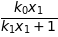

'Freundlinch'

In [2]:
k = SymbolVector.k
x = SymbolVector.x

functions = {
    'Linear': k[0] + k[1]*x[1],
    'Langmuir': k[0] * x[1] / (1 + k[1] * x[1]),
    'Freundlinch': k[0] * (x[1] ** k[1]),
}
for k, v in functions.items():
    display(k, functions[k])

    
data = [1.288, 1.723, 2.265, 2.755, 3.363, 3.764, 4.475, 4.911],
        [11.750, 10.872, 10.189, 7.773, 7.821, 11.301, 9.688, 9.566]

In [3]:
func = 
        [1.288, 1.723, 2.265, 2.755, 3.363, 3.764, 4.475, 4.911],
        [11.750, 10.872, 10.189, 7.773, 7.821, 11.301, 9.688, 9.566]

# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
xdata = numpy.array([0.0,1.0,2.0,3.0,4.0,5.0])
ydata = numpy.array([0.1,0.9,2.2,2.8,3.9,5.1])
# Initial guess.
x0    = numpy.array([0.0, 0.0, 0.0])
#Data errors can also easily be provided:

sigma = numpy.array([1.0,1.0,1.0,1.0,1.0,1.0])
#The objective function is easily (but less general) defined as the model:

def func(x, a, b, c):
    return a + b*x + c*x*x
#Usage is very simple:

import scipy.optimize as optimization

print(optimization.curve_fit(func, xdata, ydata, x0, sigma))

SyntaxError: invalid syntax (<ipython-input-3-40cad32748c7>, line 1)